# WoW item classifier

Uso de algoritmos de clasificación para predecir el tipo de la calidad (quality) de in item del popular juego World of Warcraft (WoW)
(fuente: https://www.kaggle.com/datasets/trolukovich/world-of-warcraft-items-dataset/data
código base: https://www.kaggle.com/datasets/trolukovich/world-of-warcraft-items-dataset/code
WoW Item quality: https://wowpedia.fandom.com/wiki/Quality)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importación de los data sets de la capreta data


df_head = pd.read_csv('../data/head.csv')
df_chest = pd.read_csv('../data/chest.csv')
df_legs = pd.read_csv('../data/legs.csv')
df_feet = pd.read_csv('../data/feet.csv')
df_hands = pd.read_csv('../data/hands.csv')

In [3]:
#hot encoding de tipo de variables
df_head['head_type'] = 1
df_chest['chest_type'] = 1
df_legs['legs_type'] = 1
df_feet['feet_type'] = 1
df_hands['hands_type'] = 1

In [4]:
hd = df_head.shape
c = df_chest.shape
l = df_legs.shape
f = df_feet.shape
ha = df_hands.shape

print(f'{hd} {c} {l} {f} {ha}')

(5447, 37) (5665, 32) (5507, 34) (4850, 32) (5763, 36)


In [5]:
#Creación de dataframe de los items

df = pd.concat([df_head,df_chest,df_legs,df_feet,df_hands], sort = True)
df

,agi,agiint,arcres,armor,armorbonus,chest_type,classes,cooldown,critstrkrtng,dodgertng,...,socket2,socket3,speed,speedbonus,splpwr,sta,str,strint,sturdiness,versatility
0,NaN,NaN,NaN,119.0,NaN,NaN,NaN,NaN,136.0,NaN,...,NaN,NaN,NaN,NaN,NaN,356.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,NaN,NaN,NaN,528.0,NaN,NaN,NaN,NaN,94.0,NaN,...,NaN,NaN,NaN,NaN,NaN,489.0,326.0,326.0,NaN,112.0
5759,NaN,NaN,NaN,442.0,NaN,NaN,Paladin,NaN,89.0,NaN,...,NaN,NaN,NaN,NaN,NaN,387.0,258.0,258.0,NaN,NaN
5760,258.0,258.0,NaN,201.0,NaN,NaN,Monk,NaN,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,387.0,NaN,NaN,NaN,NaN
5761,195.0,195.0,NaN,165.0,NaN,NaN,NaN,NaN,127.0,NaN,...,NaN,NaN,NaN,NaN,NaN,293.0,NaN,NaN,NaN,NaN


## Exploración de la data

In [6]:
# Exploración de los campos nulos 
df.isna().sum()

agi                14991
agiint             14996
arcres             27199
armor                582
armorbonus         27231
chest_type         21567
classes            17768
cooldown           27103
critstrkrtng       15115
dodgertng          26673
dura                3140
feet_type          22382
firres             27103
frores             27142
hands_type         21469
hastertng          18239
head_type          21785
healthrgn          27229
int                 2382
itemset            21202
legs_type          21725
lifesteal          27231
manargn            27231
mastrtng           21663
name_enus            385
natres             27177
nsockets           20393
parryrtng          26867
quality              385
reqarenartng       27092
reqlevel            4089
reqspell           27228
rgdcritstrkrtng    27231
slotbak              503
socket1            21928
socket2            22406
socket3            26367
speed              27193
speedbonus         27231
splpwr             27231


In [7]:
## realziar la misma operacion pero esta ves para detemrinar la proporcionalidad de los datos nuloe

df.isna().sum()/df.shape[0]

agi                0.550492
agiint             0.550676
arcres             0.998788
armor              0.021372
armorbonus         0.999963
chest_type         0.791973
classes            0.652468
cooldown           0.995263
critstrkrtng       0.555046
dodgertng          0.979473
dura               0.115306
feet_type          0.821901
firres             0.995263
frores             0.996695
hands_type         0.788374
hastertng          0.669764
head_type          0.799978
healthrgn          0.999890
int                0.087471
itemset            0.778569
legs_type          0.797775
lifesteal          0.999963
manargn            0.999963
mastrtng           0.795498
name_enus          0.014138
natres             0.997980
nsockets           0.748862
parryrtng          0.986597
quality            0.014138
reqarenartng       0.994859
reqlevel           0.150154
reqspell           0.999853
rgdcritstrkrtng    0.999963
slotbak            0.018471
socket1            0.805229
socket2            0

In [8]:
#Eliminación de columnas con una proporcion de nulos mayores a 0.98
supNaVals =df.columns[df.isna().sum()/df.shape[0] > 0.98]

In [9]:
df = df.drop(supNaVals, axis = 1)

In [10]:
#debido a su poca influencia o que no aportan mayor información, se eliminan los suientes campos

df = df.drop(['name_enus','classes','socket1','socket2','socket3','itemset','agiint','strint'], axis = 1)

In [11]:
#Se eliminan los mas de 300 datos nulos en quality
df = df.dropna(subset=['quality'])

In [12]:
df = df.fillna(0)
df

,agi,armor,chest_type,critstrkrtng,dodgertng,dura,feet_type,hands_type,hastertng,head_type,int,legs_type,mastrtng,nsockets,quality,reqlevel,slotbak,sta,str,versatility
0,0.0,119.0,0.0,136.0,0.0,0.0,0.0,0.0,73.0,1.0,237.0,0.0,0.0,0.0,Epic,10.0,1.0,356.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Uncommon,0.0,1.0,16.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Common,5.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Common,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Uncommon,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,0.0,528.0,0.0,94.0,0.0,0.0,0.0,1.0,0.0,0.0,326.0,0.0,0.0,0.0,Rare,120.0,10.0,489.0,326.0,112.0
5759,0.0,442.0,0.0,89.0,0.0,0.0,0.0,1.0,98.0,0.0,258.0,0.0,0.0,0.0,Uncommon,120.0,10.0,387.0,258.0,0.0
5760,258.0,201.0,0.0,98.0,0.0,0.0,0.0,1.0,89.0,0.0,258.0,0.0,0.0,0.0,Uncommon,120.0,10.0,387.0,0.0,0.0
5761,195.0,165.0,0.0,127.0,0.0,0.0,0.0,1.0,0.0,0.0,195.0,0.0,37.0,0.0,Epic,120.0,10.0,293.0,0.0,0.0


Verificación de la distribucion de la data

C:\Users\JGodoy\AppData\Local\Temp\ipykernel_17496\1612966794.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['int'])


<Axes: xlabel='int', ylabel='Density'>

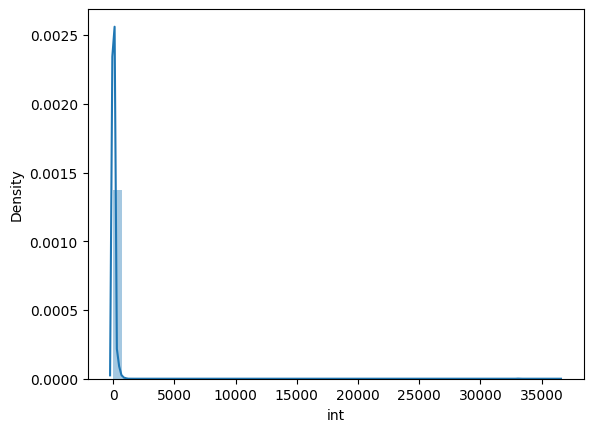

In [13]:
sns.distplot(df['int'])

No es posble ovservar el comportamiento de la data, en este caso 'int', por lo que se grafica de forma logaritmica

<Axes: xlabel='int', ylabel='Count'>

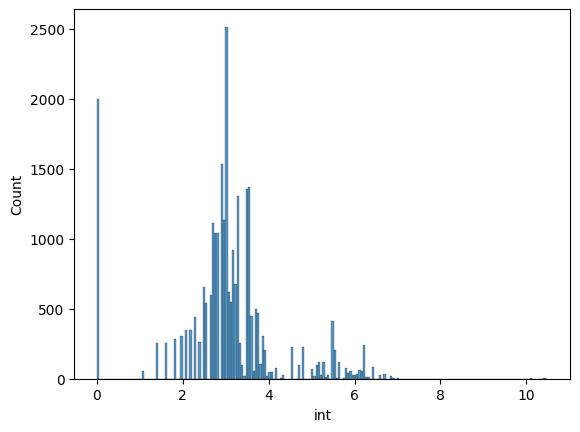

In [14]:
sns.histplot(df['int'].apply(lambda x:np.log(x+1)))

In [15]:
#Se transforman los datos escalares a su forma logaritmica
logForm = df.drop('quality',axis = 1).max()[df.drop('quality', axis = 1).max()>500].index
for col in logForm:
    df[col] = df[col].apply(lambda x:np.log(x+1))

array([[<Axes: title={'center': 'agi'}>,
        <Axes: title={'center': 'armor'}>,
        <Axes: title={'center': 'chest_type'}>,
        <Axes: title={'center': 'critstrkrtng'}>],
       [<Axes: title={'center': 'dodgertng'}>,
        <Axes: title={'center': 'dura'}>,
        <Axes: title={'center': 'feet_type'}>,
        <Axes: title={'center': 'hands_type'}>],
       [<Axes: title={'center': 'hastertng'}>,
        <Axes: title={'center': 'head_type'}>,
        <Axes: title={'center': 'int'}>,
        <Axes: title={'center': 'legs_type'}>],
       [<Axes: title={'center': 'mastrtng'}>,
        <Axes: title={'center': 'nsockets'}>,
        <Axes: title={'center': 'reqlevel'}>,
        <Axes: title={'center': 'slotbak'}>],
       [<Axes: title={'center': 'sta'}>, <Axes: title={'center': 'str'}>,
        <Axes: title={'center': 'versatility'}>, <Axes: >]], dtype=object)

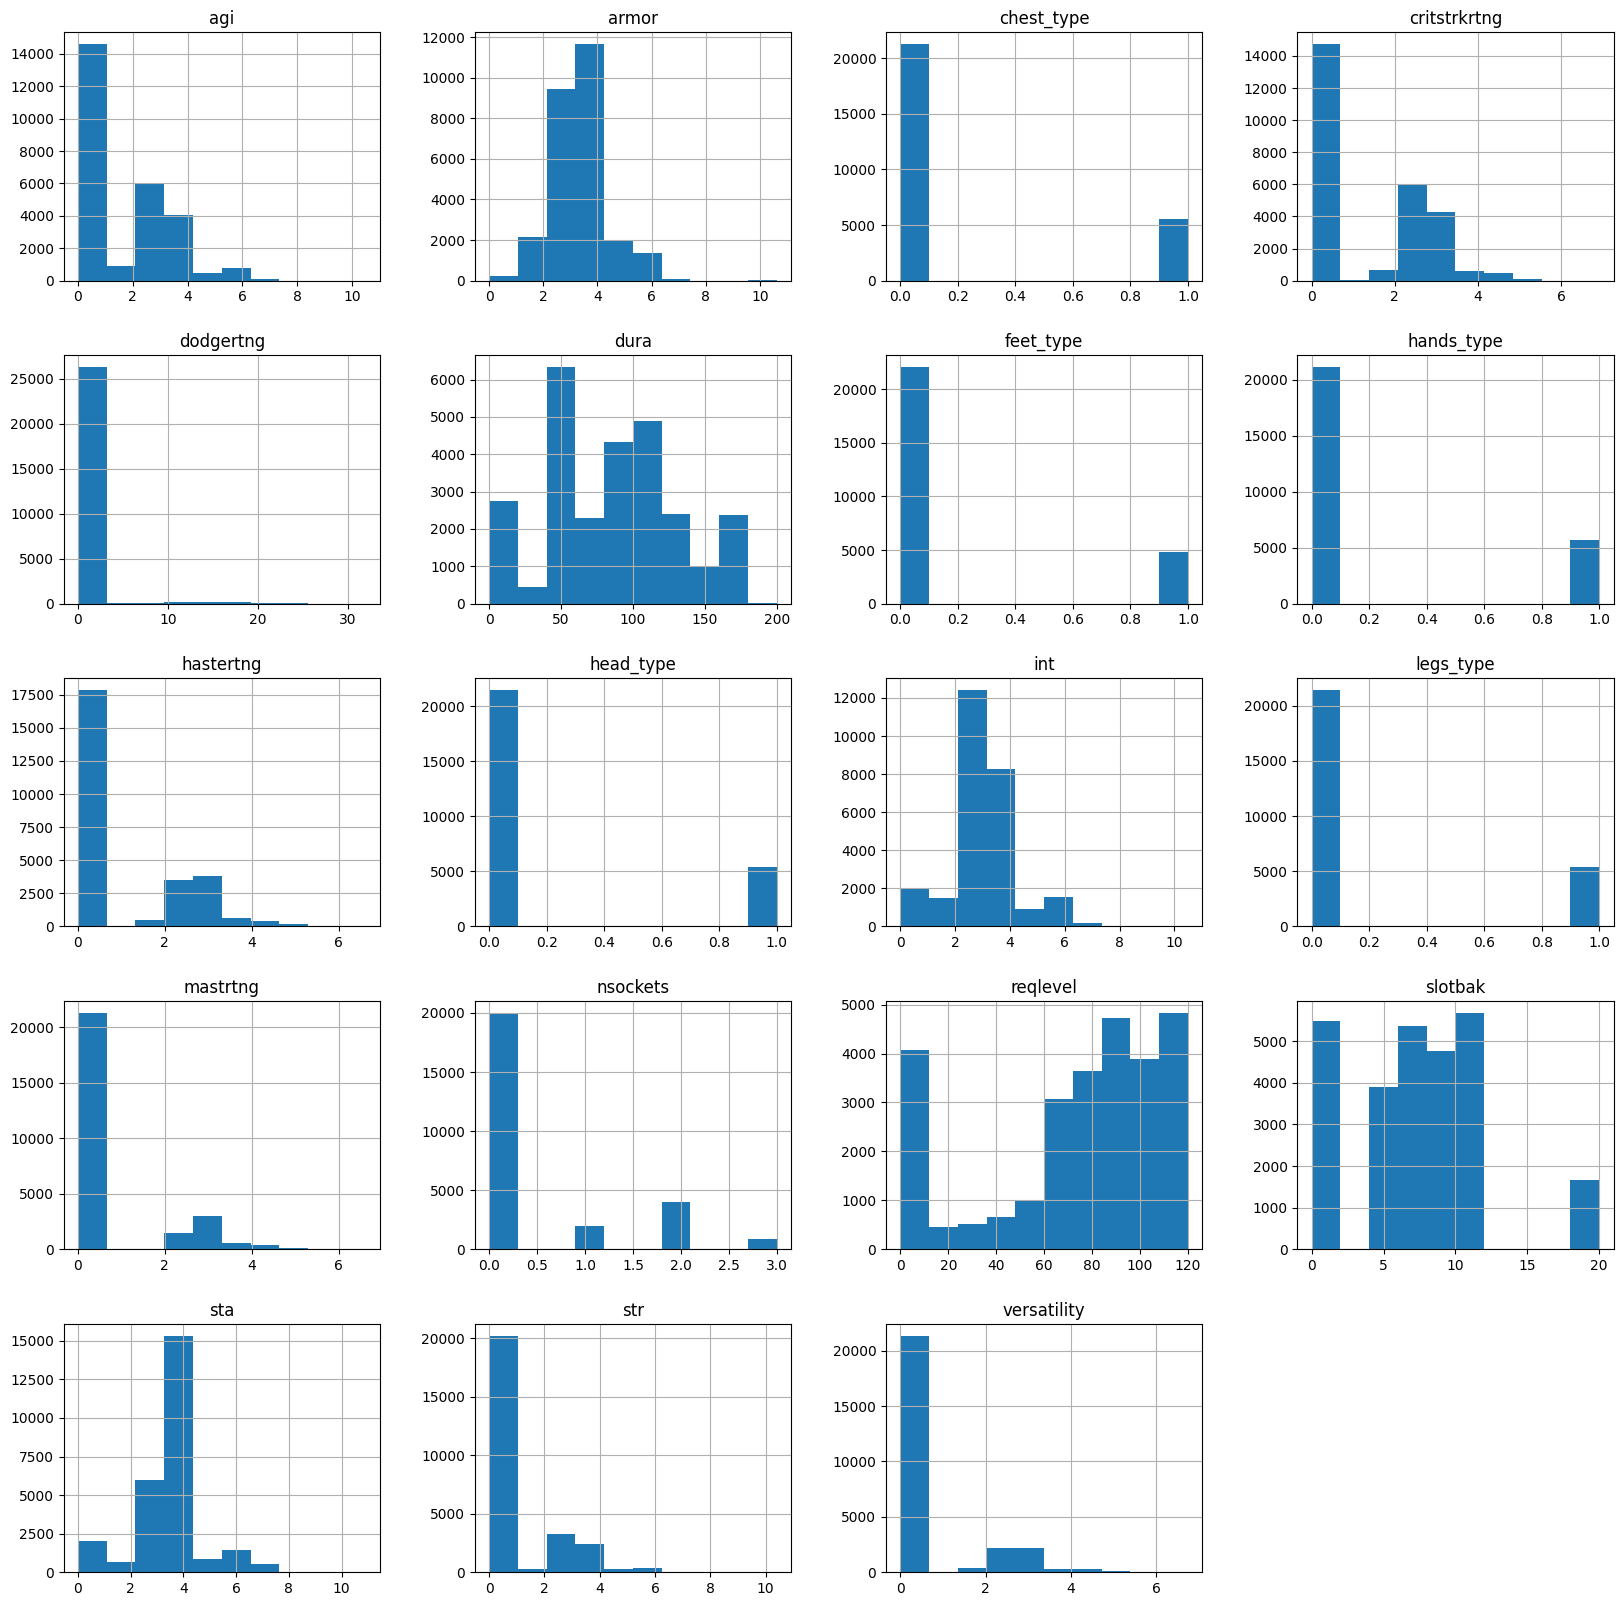

In [16]:
#Examniación de la distribución de cada una de las varaibles que describen la data
df.hist(figsize=(20,20))

In [17]:
df.quality.unique()

array(['Epic', 'Uncommon', 'Common', 'Rare', 'Poor', 'Heirloom',
       'Legendary'], dtype=object)

In [18]:
#Label encoding del campo quality

df_le = df.replace({'quality':{'Poor':0,'Common':1,'Uncommon':2,'Rare':3,'Epic':4, 'Legendary':5,'Heirloom':6}})

C:\Users\JGodoy\AppData\Local\Temp\ipykernel_17496\448579473.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_le = df.replace({'quality':{'Poor':0,'Common':1,'Uncommon':2,'Rare':3,'Epic':4, 'Legendary':5,'Heirloom':6}})


## Elaboración del modelo

In [19]:
from sklearn.model_selection import train_test_split

X = df_le.drop('quality', axis = 1)
Y = df_le['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

LABELS = ['Poor','Common','Uncommon','Rare','Epic', 'Legendary','Heirloom']

def mostrar_resultados(y_test,y_pred):
    conf_mat = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(conf_mat, xticklabels=LABELS, yticklabels=LABELS, cmap='Greens', annot=True, fmt='d')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()
    print(classification_report(y_test,y_pred))
    print(f'accuracy score: {accuracy_score(y_test, y_pred)}')

Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_entropy = DecisionTreeClassifier(max_depth=5,criterion='entropy')

tree_entropy.fit(X_train, Y_train)

Y_pred_tree = tree_entropy.predict(X_test)

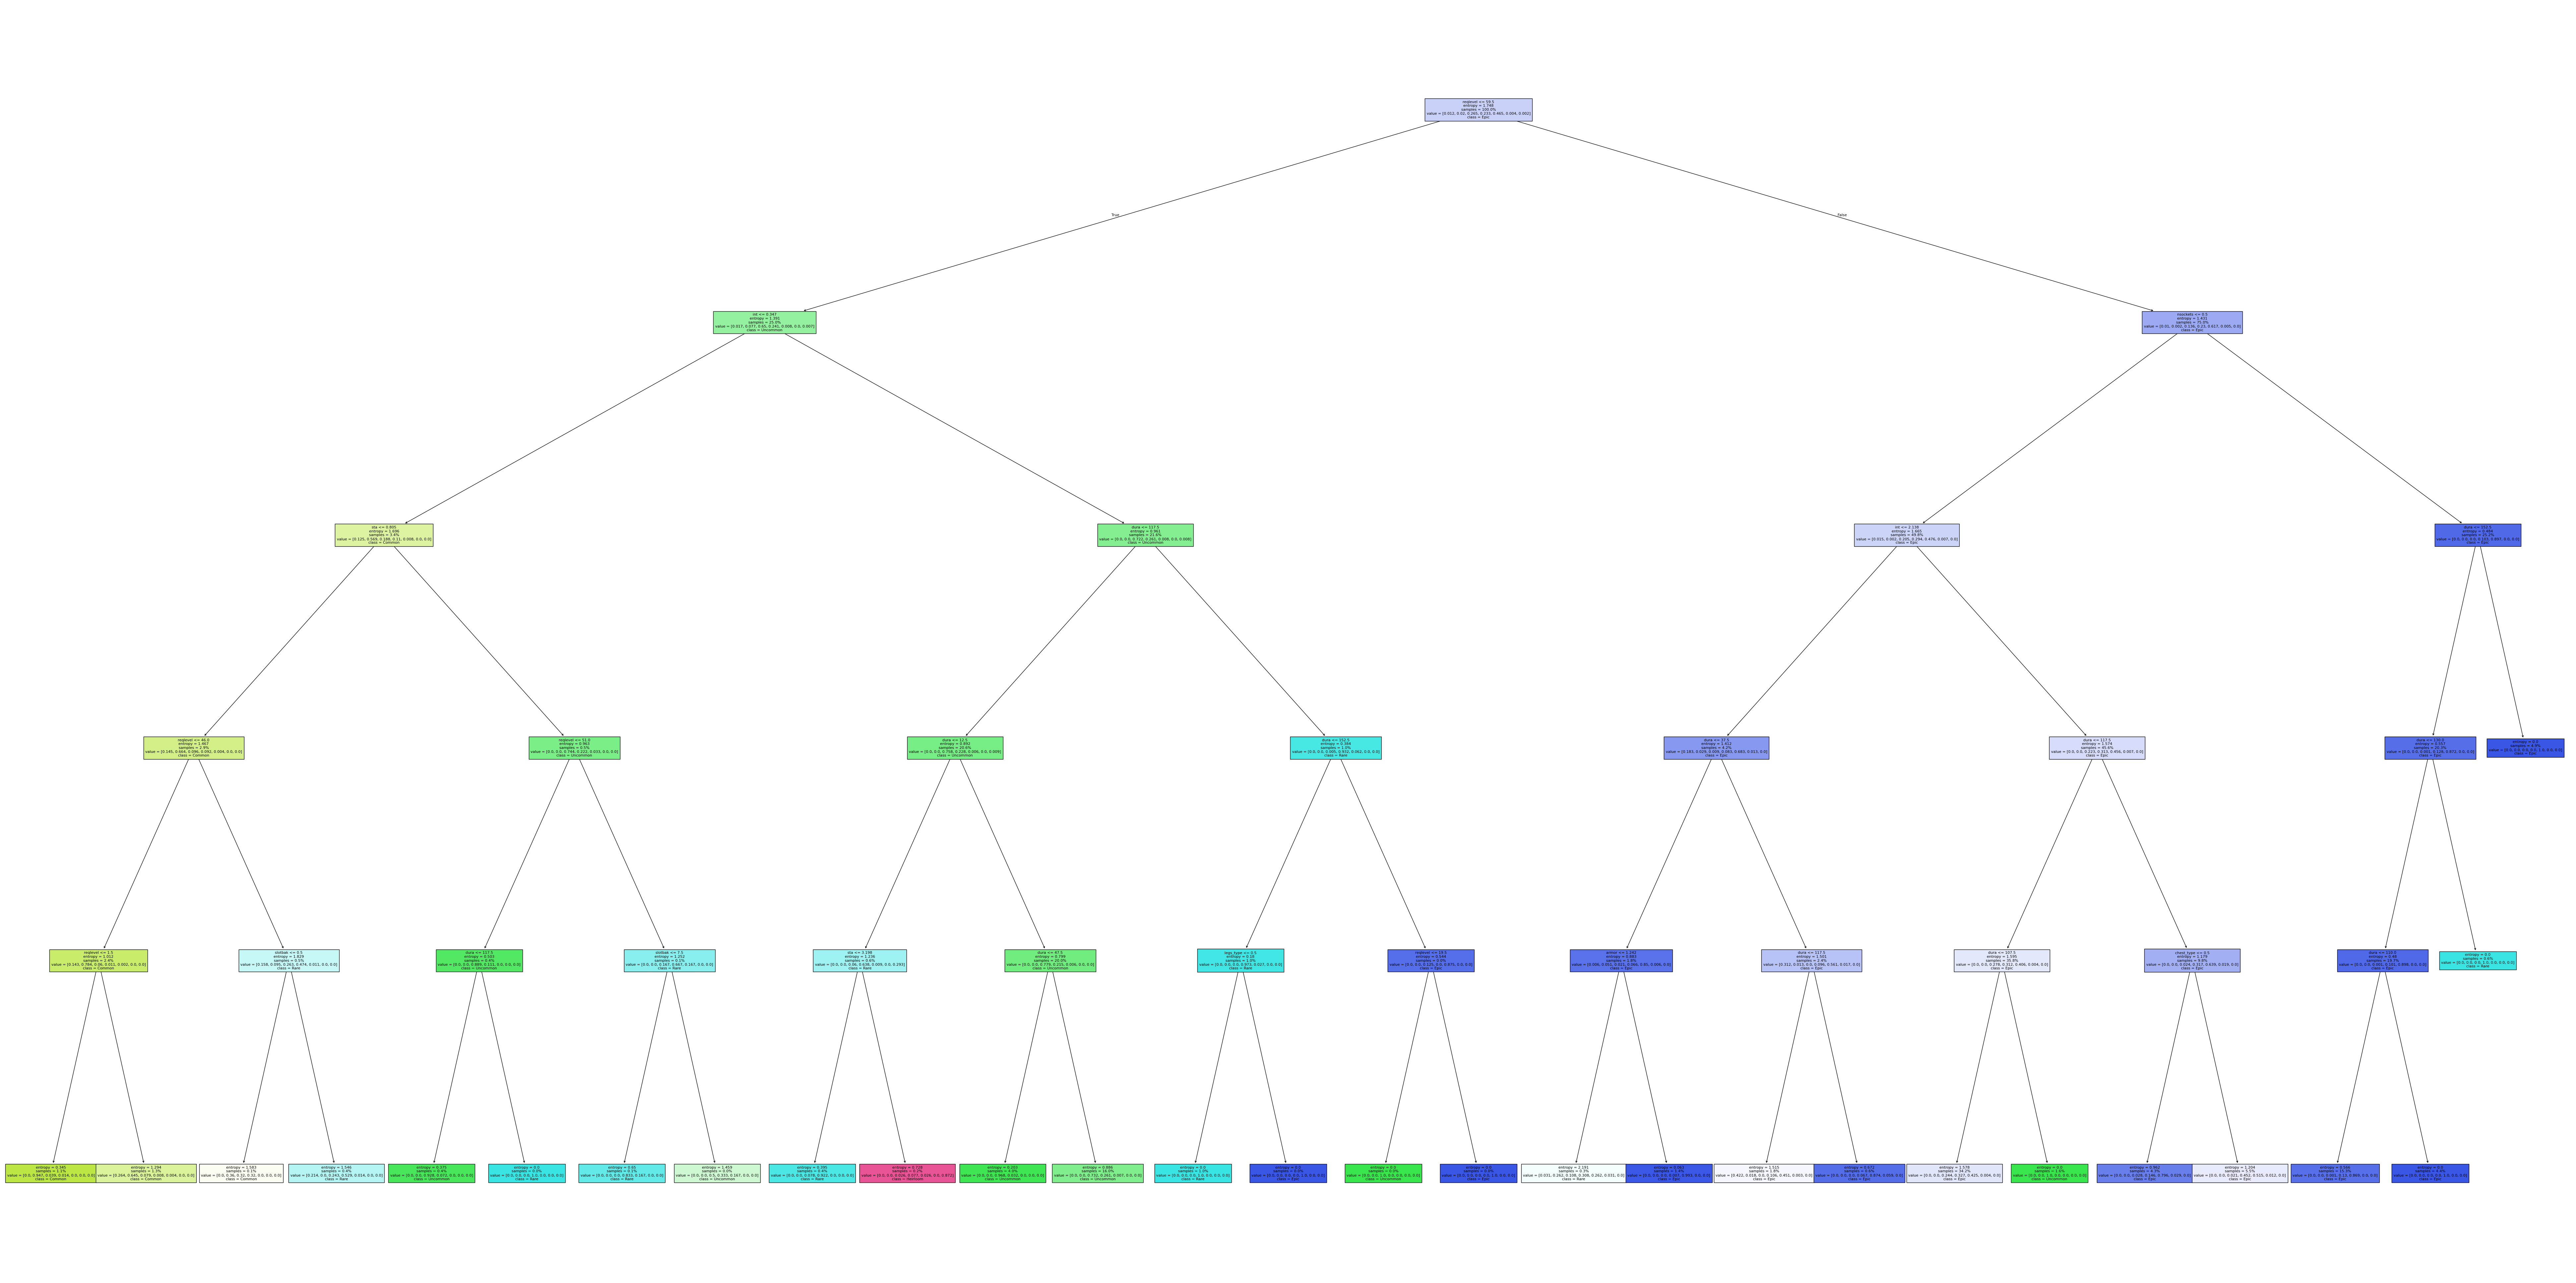

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize = (100, 50))

plot_tree(
    tree_entropy,
    feature_names = df.drop('quality', axis = 1).columns,
    class_names = LABELS,
    label = 'all',
    proportion = True,
    filled = True,
    fontsize = 8
)
plt.show()

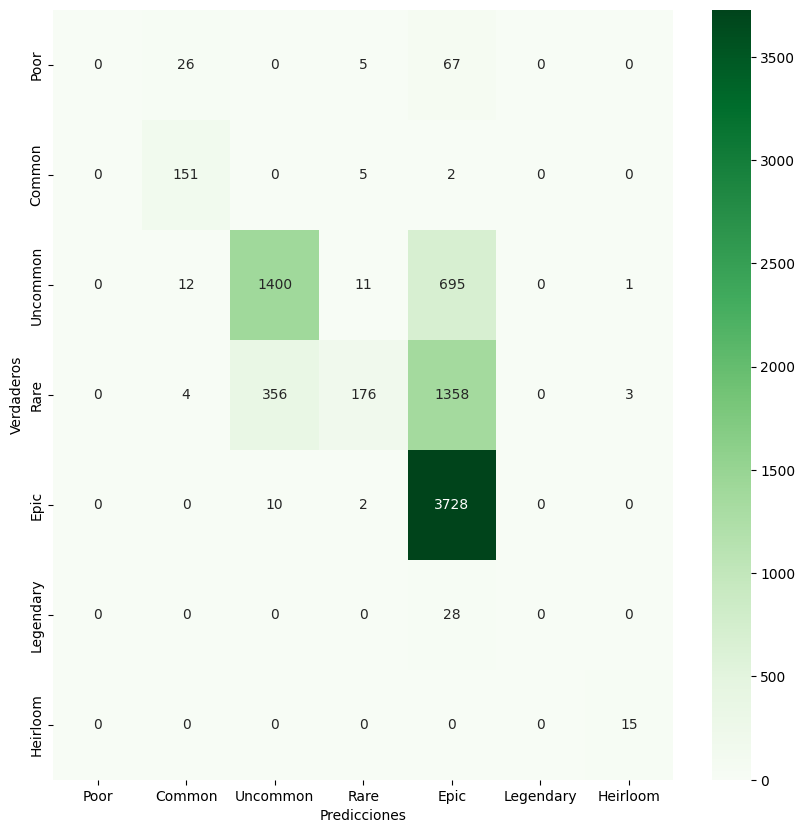

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.78      0.96      0.86       158
           2       0.79      0.66      0.72      2119
           3       0.88      0.09      0.17      1897
           4       0.63      1.00      0.78      3740
           5       0.00      0.00      0.00        28
           6       0.79      1.00      0.88        15

    accuracy                           0.68      8055
   macro avg       0.55      0.53      0.49      8055
weighted avg       0.73      0.68      0.61      8055

accuracy score: 0.6790813159528243


c:\Users\JGodoy\Documents\University Projects\Varios\WoWItem\src\WoWenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JGodoy\Documents\University Projects\Varios\WoWItem\src\WoWenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JGodoy\Documents\University Projects\Varios\WoWItem\src\WoWenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [23]:
mostrar_resultados(Y_test, Y_pred_tree)

In [24]:
##Estudio de del profundidad maxima para el mejoramietno del rendimiento del modelo

from sklearn.model_selection import cross_val_score

#features = df.drop('quality', axis = 1)
#quality_outcome = df.quality

depths = range(1,10)
performance = []
for depth in depths:
    current_tree = DecisionTreeClassifier(max_depth=depth, criterion = 'entropy')
    roc_auc = cross_val_score(
        current_tree,
        X,
        Y,
        scoring = 'roc_auc_ovo'
    ).mean()
    performance.append(roc_auc)

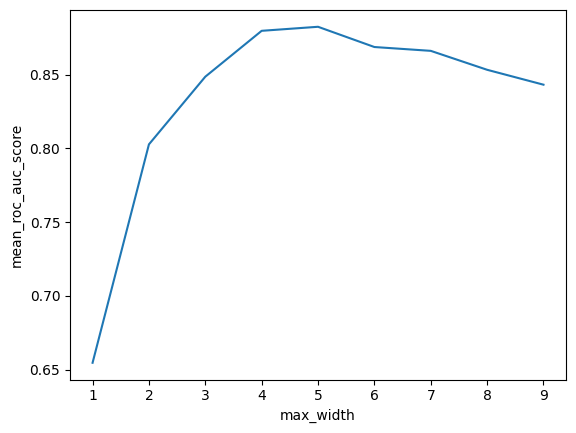

In [25]:
plt.plot(
    depths,
    performance
)
plt.xlabel('max_width')
plt.ylabel('mean_roc_auc_score')
plt.show()

Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(max_depth=10)
model_RF.fit(X_train, Y_train)
Y_pred_RF = model_RF.predict(X_test)

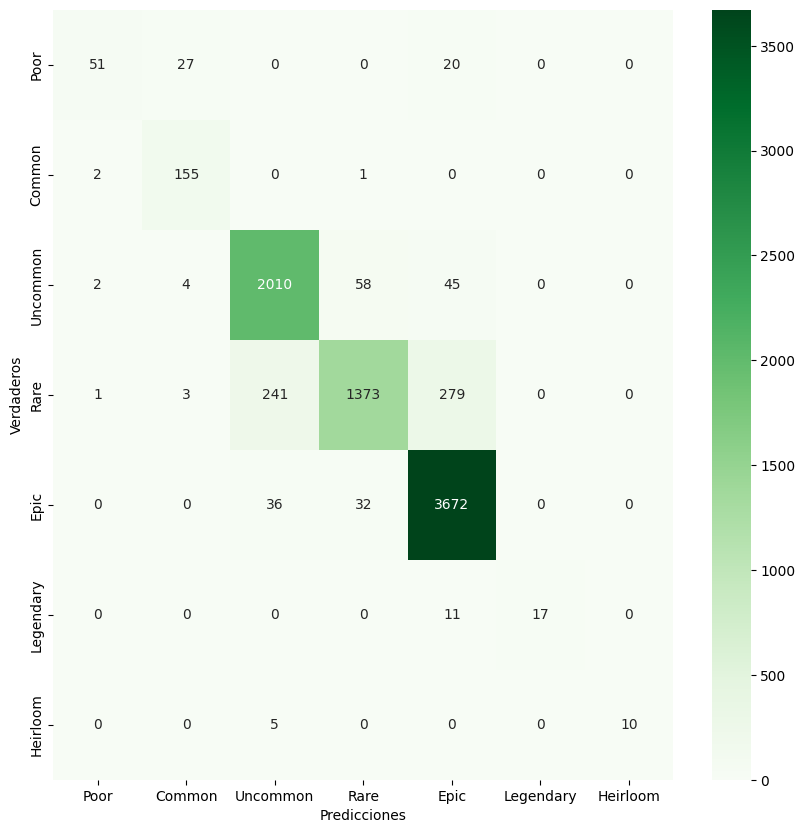

              precision    recall  f1-score   support

           0       0.91      0.52      0.66        98
           1       0.82      0.98      0.89       158
           2       0.88      0.95      0.91      2119
           3       0.94      0.72      0.82      1897
           4       0.91      0.98      0.95      3740
           5       1.00      0.61      0.76        28
           6       1.00      0.67      0.80        15

    accuracy                           0.90      8055
   macro avg       0.92      0.78      0.83      8055
weighted avg       0.91      0.90      0.90      8055

accuracy score: 0.9047796399751707


In [44]:
mostrar_resultados(Y_test, Y_pred_RF)

In [41]:
from sklearn.model_selection import cross_val_score

depths = range(1,20)
performance = []
for depth in depths:
    current_RF = RandomForestClassifier(max_depth=depth, criterion = 'entropy')
    roc_auc = cross_val_score(
        current_RF,
        X,
        Y,
        cv = 5
    ).mean()
    performance.append(roc_auc)

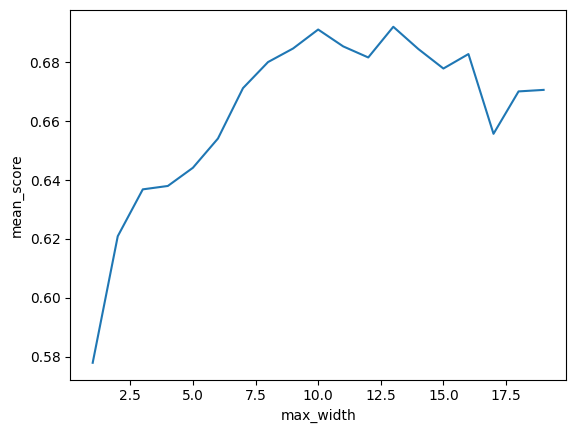

In [42]:
plt.plot(
    depths,
    performance
)
plt.xlabel('max_width')
plt.ylabel('mean_score')
plt.show()

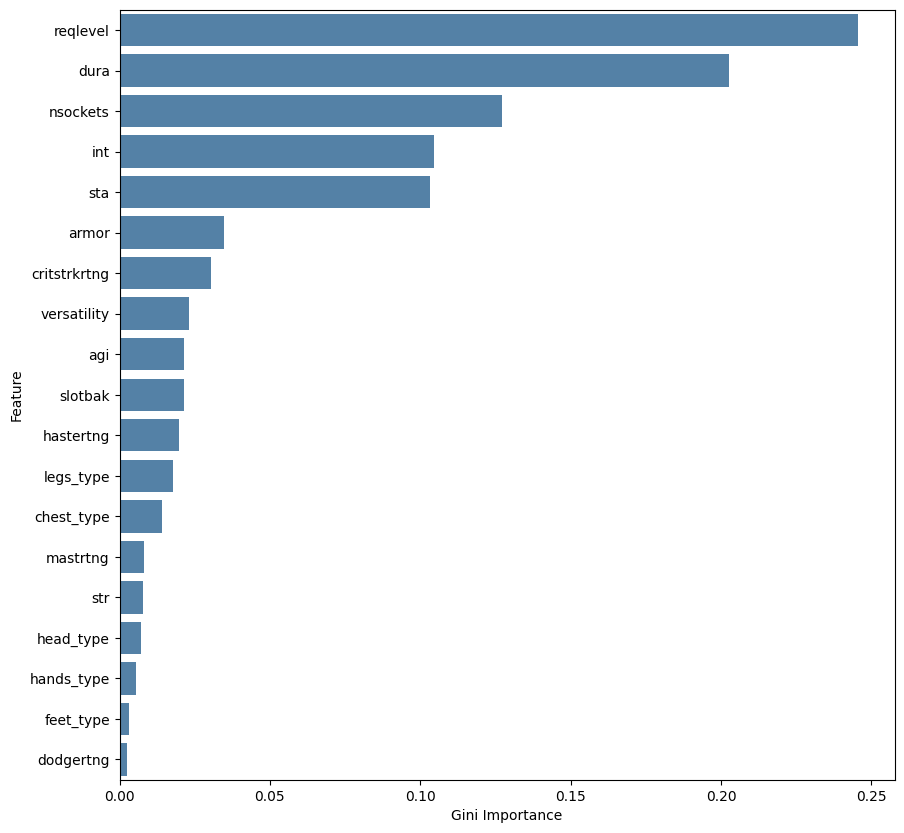

In [45]:
importance_RF = model_RF.feature_importances_
features = df_le.drop('quality', axis = 1)
feature_importance_RF = pd.DataFrame({'Feature': features.columns, 'Gini Importance': importance_RF}).sort_values('Gini Importance', ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importance_RF['Gini Importance'], y=feature_importance_RF['Feature'], color = 'steelblue', orient = 'h')
plt.show()

XGBoost

In [39]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier(max_depth = 4)
model_XGB.fit(X_train, Y_train)
Y_pred_XGB = model_XGB.predict(X_test)

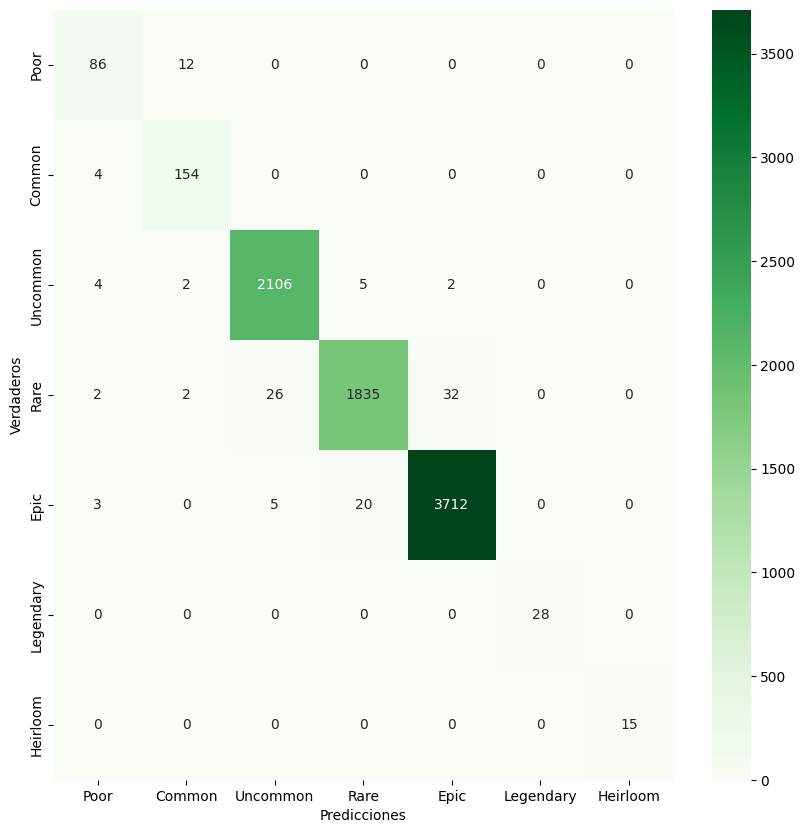

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        98
           1       0.91      0.97      0.94       158
           2       0.99      0.99      0.99      2119
           3       0.99      0.97      0.98      1897
           4       0.99      0.99      0.99      3740
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        15

    accuracy                           0.99      8055
   macro avg       0.96      0.97      0.97      8055
weighted avg       0.99      0.99      0.99      8055

accuracy score: 0.9852265673494723


In [40]:
mostrar_resultados(Y_test, Y_pred_XGB)

In [46]:
from sklearn.model_selection import cross_val_score

depths = range(1,20)
performance = []
for depth in depths:
    current_XBG = XGBClassifier(max_depth=depth)
    roc_auc = cross_val_score(
        current_XBG,
        X,
        Y,
        cv = 5
    ).mean()
    performance.append(roc_auc)

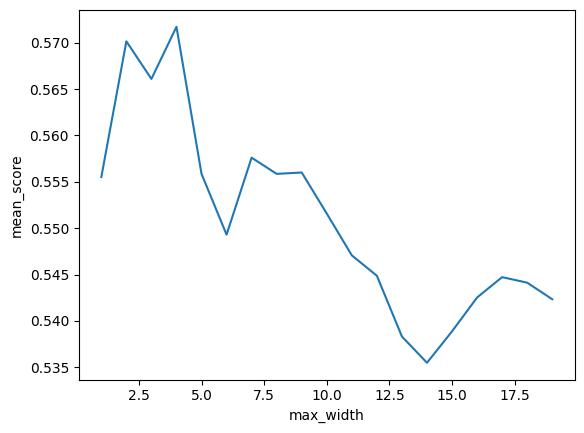

In [47]:
plt.plot(
    depths,
    performance
)
plt.xlabel('max_width')
plt.ylabel('mean_score')
plt.show()

<Figure size 1000x1000 with 0 Axes>

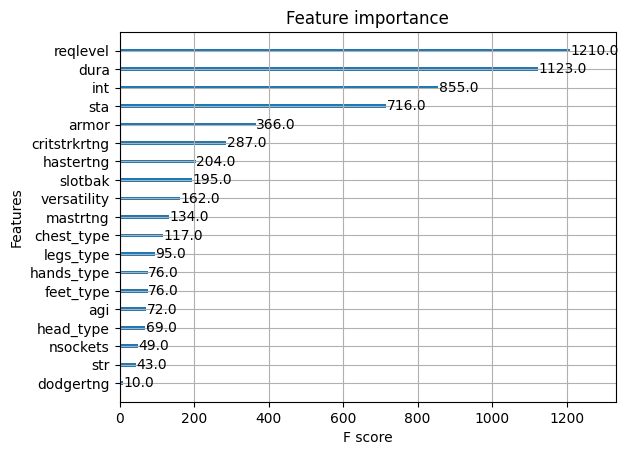

In [48]:
from xgboost import plot_importance

plt.figure(figsize=(10,10))
plot_importance(model_XGB)
plt.show()